# Project 2 (W5FP)

This is the guided notebook for the Project 2 . For this notebook, we will be using the Breast Cancer Wisconsin (Original) Data Set from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/) (Donated by Olvi Mangasarian (mangasarian '@' cs.wisc.edu) and Received by David W. Aha (aha '@' cs.jhu.edu)). You can download from the link above.

![Visualization](./images/breast_cancer.jpg)

### Data Set Information:

Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed from the data itself:

Group 1: 367 instances (January 1989)

Group 2: 70 instances (October 1989)

Group 3: 31 instances (February 1990)

Group 4: 17 instances (April 1990)

Group 5: 48 instances (August 1990)

Group 6: 49 instances (Updated January 1991)

Group 7: 31 instances (June 1991)

Group 8: 86 instances (November 1991)

-----------------------------------------------------------
Total: 699 points (as of the donated datbase on 15 July 1992)


## Part 1: Familiarize Yourself With the Dataset

Below is the dataset description from the UCI Machine Learning Repository.


|Feature name |Values|
|	----	|-----------|
|	Sample code number		|id number|
|	Clump Thickness	|               1 - 10|
|	Uniformity of Cell Size	|1 - 10|
|	Uniformity of Cell Shape	|1 - 10|
|	Marginal Adhesion|1 - 10|
|	Single Epithelial Cell Size	|1 - 10|
|	Bare Nuclei	|1 - 10|
|	Bland Chromatin	|1 - 10|
|	Normal Nucleoli	|1 - 10|
|	Mitoses	|1 - 10|
|	Class	|(2 for benign, 4 for malignant)|


## Loading the data

In [1]:
import csv
f = open("./dataset/breast-cancer-wisconsin-data.csv")

## Cleaning the data

In [2]:
dataset = []

# As i am not using dictionary set, so i am not appending header to data set.
# Mentioning list so that we can get reference any time.
header = ['Id number', 'Clump Thickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Epithelial Cell Size', 'Bare Nuclei', 
          'Chromatin', 'Nucleoli', 'Mitoses', 'Class']
for l in f:
    if '?' in l: # Removing rows containing '?'.
        continue
    l = l.split(',')
    values = [1] + [float(x) for x in l] # Appending column vector of 1 to which act as offset value.
    values[-1] = values[-1] > 3 # Converting 'Class' column numeric value to bool.
    dataset.append(values)

In [3]:
len(dataset) 

683

Length of the orignal dataset was 699, after removing rows containing '?' we get length of dataset as 683

In [4]:
dataset[0]
# index 0 of currect dataset

[1, 1000025.0, 5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, False]

### Our dataset contains 1 column which is not relevant. Column[1] ---> Sample code number, this is just random number just like order id which cannot be mapped to the output, so we have delete it from the dataset.

In [5]:
for j in dataset:
    del j[1]

In [6]:
dataset[0]

[1, 5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, False]

Our new dataset now contain only relevant values

## Part 2: Simple Statistics

A tumor can be cancerous or benign. A **cancerous** tumor is **malignant**, meaning it can grow and spread to other parts of the body.

In [7]:
malignant_people = [d[10] for d in dataset if d[10] == True]
benign_people = len(dataset) - len(malignant_people)
print("Malignant cases = " + str(len(malignant_people))) # malignant
print("Benign cases = " + str(benign_people)) # benign

Malignant cases = 239
Benign cases = 444


In [8]:
# Clump Thickness
# Thickness Rating is abbreviated for TR
Average_TR_malignant = sum([d[1] for d in dataset if d[10]==True])/len(malignant_people)
Average_TR_benign = sum([d[1] for d in dataset if d[10]==True])/benign_people
print("Average Clump Thickness Rating(Malignant) " + str(Average_TR_malignant))
print("Average Clump Thickness Rating(Benign) " + str(Average_TR_benign))

Average Clump Thickness Rating(Malignant) 7.188284518828452
Average Clump Thickness Rating(Benign) 3.869369369369369


#### As we can clearly see, Average clump thickness of malignant tumor is way higher than benign tumor.

In [9]:
# Uniformity of Cell Size
# Cell Size is abbreviated for CS
Average_CS_malignant = sum([d[2] for d in dataset if d[10]==True])/len(malignant_people)
Average_CS_benign = sum([d[2] for d in dataset if d[10]==True])/benign_people
print("Average Cell Size Rating(Malignant) " + str(Average_CS_malignant))
print("Average Cell Size Thickness Rating(Benign) " + str(Average_CS_benign))

Average Cell Size Rating(Malignant) 6.577405857740586
Average Cell Size Thickness Rating(Benign) 3.5405405405405403


#### As we can clearly see, Average cell size of malignant tumor is way higher than benign tumor.

There is very clear distinction between malignant and benign tumor. As the dataset is fairly straight forward not much statistics about the dataset is needed. 

## Part 3: Data Visualization

In [10]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy
from collections import defaultdict
from matplotlib.ticker import PercentFormatter
%matplotlib inline

defaultdict(<class 'int'>, {False: 444, True: 239})


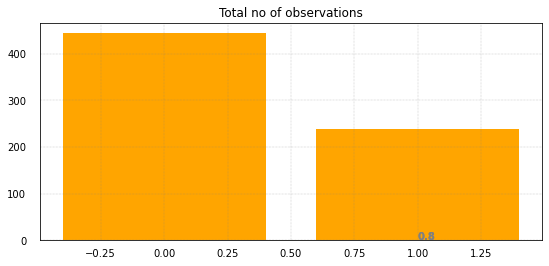

In [11]:
# Bar Plot Showing Total Number Of People With Respective Work Fields

counts_per_job = [d[10] for d in dataset]

counts_j = defaultdict(int)
for c in counts_per_job:
    counts_j[c] += 1
print(counts_j)

#Plotting

# Figure Size
fig, ax = plt.subplots(figsize =(9, 4)) 

X = list(counts_j.keys())
Y = list(counts_j.values())
# Horizontal Bar Plot 
ax.bar(X, Y, color = 'orange')
  
# Remove axes splines 
#for s in ['top', 'bottom', 'left', 'right']: 
#    ax.spines[s].set_visible(False) 

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.7)

# Show Top Values
#ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
    
# Add Plot Title
ax.set_title('Total no of observations', 
             loc ='Center', ) 
  
# Show Plot 
plt.show()

Benign class numbers = 444
Malignant class numbers = 239


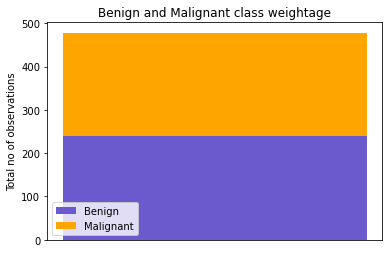

In [12]:
# Example Stacked Bar Chart - Comparisons Between Cancer Class
Benign = len([d[10] for d in dataset if d[10] is False])
Malignant = len([d[10] for d in dataset if d[10] is True])
index = [1]
print("Benign class numbers = " + str(Benign))
print("Malignant class numbers = " + str(Malignant))
p1 = plt.bar(index, Benign, color='slateblue')
p2 = plt.bar(index, Malignant, bottom=Malignant, color='orange')
plt.gca().set(title='Benign and Malignant class weightage', ylabel='Total no of observations');
plt.xticks([])

plt.legend((p1[0], p2[0]), ('Benign', 'Malignant'))
plt.show()

## Part 4: Applying classification algorithm

### Making train and test set from dataset

In [13]:
from sklearn import linear_model
model = linear_model.LogisticRegression()

import random
random.shuffle(dataset)

X = [values[:-1] for values in dataset]
y = [values[-1] for values in dataset]

N = len(X)
X_train = X[:N//2]
X_test = X[N//2:]
y_train = y[:N//2]
y_test = y[N//2:]


model.fit(X_train, y_train)

LogisticRegression()

In [14]:
predictionsTrain = model.predict(X_train)
predictionsTest = model.predict(X_test)

In [15]:
correctPredictionsTrain = predictionsTrain == y_train
correctPredictionsTest = predictionsTest == y_test

In [16]:
sum(correctPredictionsTrain) / len(correctPredictionsTrain) # Train Accuracy

0.9765395894428153

In [17]:
sum(correctPredictionsTest) / len(correctPredictionsTest) # Test Accuracy

0.9678362573099415

We got 97.6% Accuracy on train set and 96.8% accuracy on test set which is very good. Also the dataset is fairly straight forward which works very good when applying classification algorithms like LogisticRegression.